In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import csv
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA,IncrementalPCA, FactorAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn import preprocessing
plt.rcParams['figure.figsize'] = [10, 5]
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
pd.options.display.max_columns = 9999
pd.options.display.max_rows = 999999

In [2]:
apptrain=pd.read_csv("application_train.csv")
apptest=pd.read_csv("application_test.csv")
bureau=pd.read_csv("bureau.csv")
bbal=pd.read_csv("bureau_balance.csv")
ccbal=pd.read_csv("credit_card_balance.csv")
innpay=pd.read_csv("installments_payments.csv")
POS=pd.read_csv("POS_CASH_balance.csv")
old=pd.read_csv("previous_application.csv")
final_train_encoded=pd.read_csv("apptrain_encoded.csv")
final_test_encoded=pd.read_csv("apptest_encoded.csv")

In [3]:
sm=SMOTE(random_state=15,ratio='minority')
x_res,y_res=sm.fit_sample(X=final_train_encoded.drop("TARGET",axis=1),y=final_train_encoded["TARGET"])


In [5]:
min_max_scaler = preprocessing.MinMaxScaler()
Xx = min_max_scaler.fit_transform(x_res)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.33, random_state=42)

In [71]:
rfclf = RandomForestClassifier(n_estimators=512,random_state=12)

In [72]:
rfclf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=512, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [10]:
important=rfclf.feature_importances_

In [13]:
indices = np.argsort(important)[::-1]  #IMPORTANT STEP

In [17]:
std = np.std([tree.feature_importances_ for tree in rfclf.estimators_],
             axis=0)

In [187]:
for f in range(X_train.shape[1]):
    print("%d. %d %s (%f)" % (f + 1, indices[f] , final_train_encoded.columns[indices[f]], important[indices[f]]))


1. feature 107 CODE_GENDER_F (0.037204)
2. feature 246 EMERGENCYSTATE_MODE_No (0.020708)
3. feature 30 EXT_SOURCE_3 (0.034224)
4. feature 132 NAME_EDUCATION_TYPE_Secondary / secondary special (0.024277)
5. feature 134 NAME_FAMILY_STATUS_Married (0.022452)
6. feature 109 FLAG_OWN_CAR_N (0.024032)
7. feature 234 HOUSETYPE_MODE_block of flats (0.019415)
8. feature 127 NAME_INCOME_TYPE_Working (0.017825)
9. feature 29 EXT_SOURCE_2 (0.025061)
10. feature 26 REG_CITY_NOT_WORK_CITY (0.014716)
11. feature 16 FLAG_PHONE (0.015642)
12. feature 129 NAME_EDUCATION_TYPE_Higher education (0.022140)
13. feature 80 FLAG_DOCUMENT_3 (0.010149)
14. feature 242 WALLSMATERIAL_MODE_Panel (0.011762)
15. feature 20 REGION_RATING_CLIENT_W_CITY (0.012193)
16. feature 111 FLAG_OWN_REALTY_N (0.013479)
17. feature 1 CNT_CHILDREN (0.009104)
18. feature 108 CODE_GENDER_M (0.035144)
19. feature 175 ORGANIZATION_TYPE_Business Entity Type 3 (0.007819)
20. feature 19 REGION_RATING_CLIENT (0.012491)
21. feature 152 OCCUP

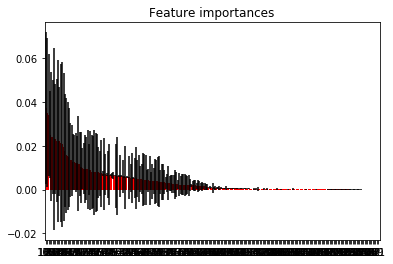

In [177]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), important[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [73]:
probs = rfclf.predict(X_test)

In [42]:
accuracy_score(y_test, probs)

0.9558242618170903

In [43]:
roc_auc_score(y_test,probs)

0.9557846850423269

In [44]:
confusion_matrix(y_test,probs)

array([[93370,     0],
       [ 8242, 84961]], dtype=int64)

In [45]:
#preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

Text(0.5,0,'False Positive Rate')

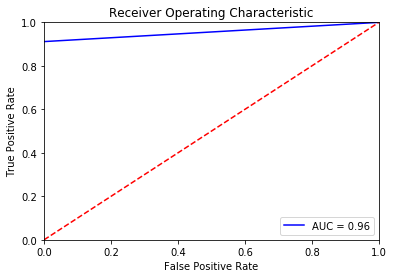

In [46]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [74]:
probs = rfclf.predict_proba(final_test_encoded)

In [75]:
Submission=pd.DataFrame({'SK_ID_CURR':final_test_encoded.SK_ID_CURR,'TARGET':probs[:,1].round(1)})


In [76]:
Submission.head()

,SK_ID_CURR,TARGET
0,100001,0.2
1,100005,0.5
2,100013,0.4
3,100028,0.1
4,100038,0.4


In [77]:
Submission.to_csv("Submission_RF.csv",sep=',',encoding='utf-8',index=False)

In [60]:
import lightgbm as lgb

In [61]:
sm=SMOTE(random_state=15,ratio='minority')
x_res,y_res=sm.fit_sample(X=final_train_encoded.drop("TARGET",axis=1),y=final_train_encoded["TARGET"])

In [62]:
min_max_scaler = preprocessing.MinMaxScaler()
Xx = min_max_scaler.fit_transform(x_res)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(Xx, y_res, test_size=0.33, random_state=42)

In [115]:
train_data = lgb.Dataset(data=X_train,label=y_train)

In [116]:
param = {'num_leaves':128, 'num_trees':1024, 'objective':'binary'}
param['metric'] = ['roc_curve','binary_logloss']

In [169]:
#EVALUATING 

bst = lgb.train(param, train_data, num_boost_round=200)

In [170]:
#EVALUATING
ypred = bst.predict(X_test)

In [171]:
accuracy_score(y_test, np.round(ypred))

0.9558135421524014

In [172]:
roc_auc_score(y_test,np.round(ypred))

0.9557769398481306

In [173]:
confusion_matrix(y_test,np.round(ypred))

array([[93059,   311],
       [ 7933, 85270]], dtype=int64)

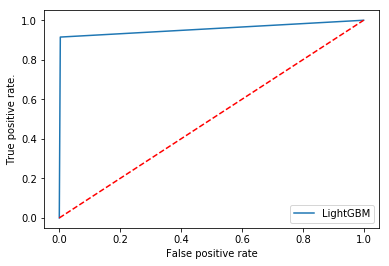

In [174]:
fpr, tpr, thresholdsValid = roc_curve(y_test,np.round(ypred))
plt.plot(fpr, tpr, label='LightGBM')
plt.legend()
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True positive rate.')
plt.xlabel('False positive rate')
plt.show()

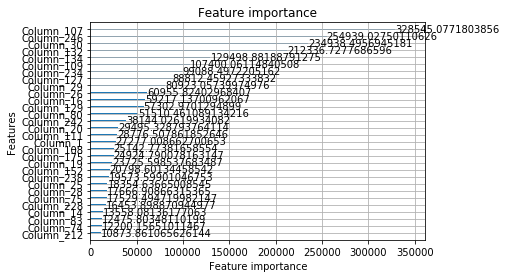

In [181]:
ax = lgb.plot_importance(bst, max_num_features=30,importance_type='gain')
plt.show()

In [191]:
indices = np.argsort(bst.feature_importance("gain"))[::-1] 

In [193]:
indices2 = np.argsort(bst.feature_importance("split"))[::-1]

In [192]:
for f in range(X_train.shape[1]):
    print("%d. %d %s (%f)" % (f + 1, indices[f], final_train_encoded.columns[indices[f]], bst.feature_importance("gain")[indices[f]]))

1. 107 CODE_GENDER_F (328545.077180)
2. 246 EMERGENCYSTATE_MODE_No (254939.027501)
3. 30 EXT_SOURCE_3 (234938.495695)
4. 132 NAME_EDUCATION_TYPE_Secondary / secondary special (212336.727769)
5. 134 NAME_FAMILY_STATUS_Married (129498.881888)
6. 109 FLAG_OWN_CAR_N (107400.061148)
7. 234 HOUSETYPE_MODE_block of flats (99088.497221)
8. 127 NAME_INCOME_TYPE_Working (88812.459273)
9. 29 EXT_SOURCE_2 (80923.057400)
10. 26 REG_CITY_NOT_WORK_CITY (60955.824030)
11. 16 FLAG_PHONE (59217.137010)
12. 129 NAME_EDUCATION_TYPE_Higher education (57302.970129)
13. 80 FLAG_DOCUMENT_3 (51510.461089)
14. 242 WALLSMATERIAL_MODE_Panel (38144.026199)
15. 20 REGION_RATING_CLIENT_W_CITY (29495.328794)
16. 111 FLAG_OWN_REALTY_N (28776.507862)
17. 1 CNT_CHILDREN (27277.008663)
18. 108 CODE_GENDER_M (25142.773817)
19. 175 ORGANIZATION_TYPE_Business Entity Type 3 (24924.790078)
20. 19 REGION_RATING_CLIENT (23725.598538)
21. 152 OCCUPATION_TYPE_Laborers (20798.601345)
22. 238 WALLSMATERIAL_MODE_Missing (19573.59901

In [ ]:
#FINAL TRAIN
train_data = lgb.Dataset(data=x_res,label=y_res)

In [109]:
#FINAL
param = {'num_leaves':128, 'num_trees':1024, 'objective':'binary'}
param['metric'] = ['roc_curve','binary_logloss']

bst = lgb.train(param, train_data, num_boost_round=150,keep_training_booster=True)

In [110]:
#FINAL
ypred = bst.predict(final_test_encoded)

In [111]:
SubmissionLGBM=pd.DataFrame({'SK_ID_CURR':final_test_encoded.SK_ID_CURR,'TARGET':ypred.round(1)})

In [112]:
SubmissionLGBM.head()

,SK_ID_CURR,TARGET
0,100001,0.0
1,100005,0.2
2,100013,0.1
3,100028,0.0
4,100038,0.1


In [113]:
SubmissionLGBM.to_csv("SubmissionLGBM_SMOTE_R150.csv",sep=',',encoding='utf-8',index=False)

In [ ]:
#Training and evaluating based on top features only

In [236]:
topfeatures=final_train_encoded[final_train_encoded.columns[indices[:150]].tolist()]

In [237]:
sm=SMOTE(random_state=15,ratio='minority')
x_res,y_res=sm.fit_sample(X=topfeatures,y=final_train_encoded["TARGET"])

In [238]:
min_max_scaler = preprocessing.MinMaxScaler()
Xx = min_max_scaler.fit_transform(x_res)

In [239]:
X_train, X_test, y_train, y_test = train_test_split(Xx, y_res, test_size=0.33, random_state=42)

In [240]:
train_data = lgb.Dataset(data=X_train,label=y_train)

In [241]:
param = {'num_leaves':128, 'num_trees':1024, 'objective':'binary'}
param['metric'] = ['roc_curve','binary_logloss']

In [242]:
#EVALUATING 

bst = lgb.train(param, train_data, num_boost_round=200)

D:\product\Anaconda\lib\site-packages\lightgbm\engine.py:102: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [243]:
#EVALUATING
ypred = bst.predict(X_test)

In [244]:
accuracy_score(y_test, np.round(ypred))

0.955566989864557

In [245]:
roc_auc_score(y_test,np.round(ypred))

0.9555303106020003

In [246]:
confusion_matrix(y_test,np.round(ypred))

array([[93044,   326],
       [ 7964, 85239]], dtype=int64)

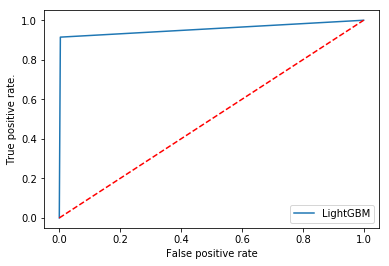

In [247]:
fpr, tpr, thresholdsValid = roc_curve(y_test,np.round(ypred))
plt.plot(fpr, tpr, label='LightGBM')
plt.legend()
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True positive rate.')
plt.xlabel('False positive rate')
plt.show()

In [248]:
train_data = lgb.Dataset(data=Xx,label=y_res)

In [249]:
param = {'num_leaves':128, 'num_trees':1024, 'objective':'binary'}
param['metric'] = ['roc_curve','binary_logloss']

In [250]:
bst = lgb.train(param, train_data, num_boost_round=100)

D:\product\Anaconda\lib\site-packages\lightgbm\engine.py:102: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [253]:
ypred = bst.predict(final_test_encoded)

In [254]:
SubmissionLGBM=pd.DataFrame({'SK_ID_CURR':final_test_encoded.SK_ID_CURR,'TARGET':ypred.round(1)})

In [255]:
SubmissionLGBM.to_csv("SubmissionLGBM_IMP_F.csv",sep=',',encoding='utf-8',index=False)

In [257]:
cv_results = lgb.cv(param, 
                     train_data, # Using all training data
                     num_boost_round = 100, 
                     nfold = 20, 
                     stratified = False, 
                     shuffle = True, 
                     early_stopping_rounds = 20, 
                     verbose_eval = 10, 
                     show_stdv = True, 
                     seed = 0)

[10]	cv_agg's binary_logloss: 0.316371 + 0.000988097
[20]	cv_agg's binary_logloss: 0.206996 + 0.00154699
[30]	cv_agg's binary_logloss: 0.166288 + 0.00170676
[40]	cv_agg's binary_logloss: 0.149979 + 0.00180804
[50]	cv_agg's binary_logloss: 0.142636 + 0.00182498
[60]	cv_agg's binary_logloss: 0.139233 + 0.00187857
[70]	cv_agg's binary_logloss: 0.137452 + 0.00189103
[80]	cv_agg's binary_logloss: 0.136417 + 0.00189001
[90]	cv_agg's binary_logloss: 0.1359 + 0.00189904
[100]	cv_agg's binary_logloss: 0.135624 + 0.00183192
